In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [2]:
spotify = pd.read_csv('spotify.csv')

# Dividing the data
X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

# Making 2 feature lists
# Numerical Features
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo', 'duration_ms']
# Catagoriacl Features
features_cat = ['playlist_genre']

# Preprocessing
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat)
)


def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

# Splitting train and test data
X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100      #Since popularity is from 0-100 we rescale it 0-1
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape = ", input_shape)

Input shape =  [18]


Minimum Validation Loss: 0.1996


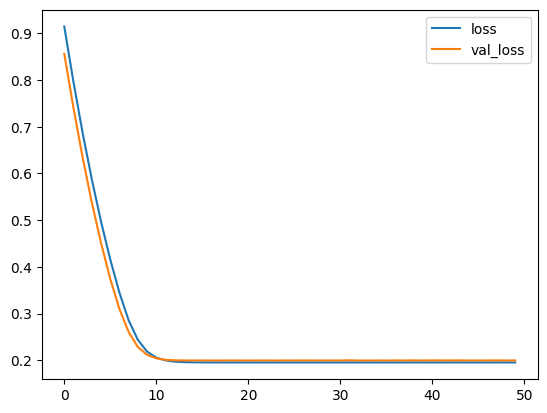

In [3]:
# Making a simple network, a linear model.
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape)
])
model.compile(
    optimizer='adam',
    loss='mae'
)
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 512,
    epochs = 50,
    verbose = 0    # Supress the output so we can plot the graph
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

Minimum Validation Loss: 0.1996


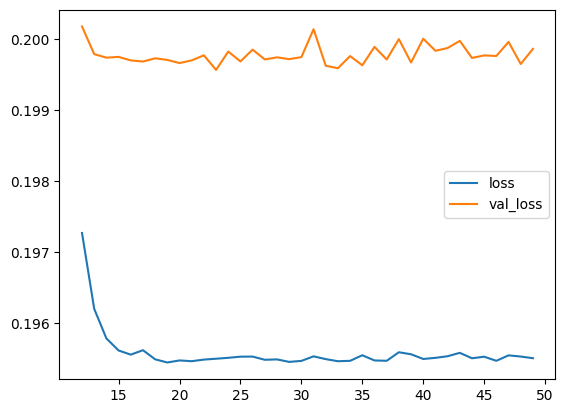

In [4]:
history_df.loc[12:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Epoch 1/50
49/49 [==============================] - 1s 6ms/step - loss: 0.2182 - val_loss: 0.2057
Epoch 2/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1975 - val_loss: 0.2007
Epoch 3/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1941 - val_loss: 0.2009
Epoch 4/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1916 - val_loss: 0.2003
Epoch 5/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1887 - val_loss: 0.1999
Epoch 6/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1881 - val_loss: 0.1992
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1866 - val_loss: 0.2008
Epoch 8/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1866 - val_loss: 0.1990
Epoch 9/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1848 - val_loss: 0.1996
Epoch 10/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1851 - val_loss: 0.1990
Epoch 11/50
49/49 [

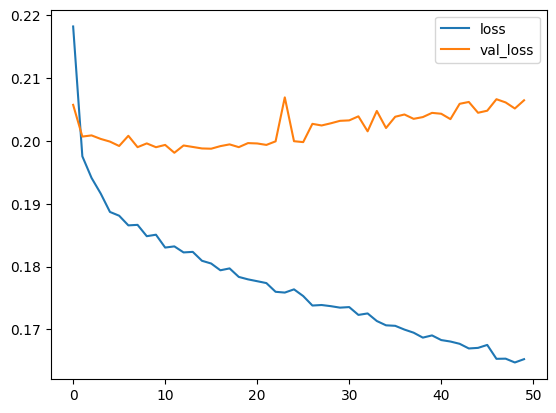

In [5]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 512,
    epochs = 50
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss = {:0.4f}".format(history_df['val_loss'].min()))

In [6]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 6,
    restore_best_weights = True
)

Epoch 1/50
49/49 [==============================] - 1s 5ms/step - loss: 0.2548 - val_loss: 0.2078
Epoch 2/50
49/49 [==============================] - 0s 3ms/step - loss: 0.2018 - val_loss: 0.2031
Epoch 3/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1968 - val_loss: 0.2005
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1935 - val_loss: 0.2000
Epoch 5/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1913 - val_loss: 0.1991
Epoch 6/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1904 - val_loss: 0.1994
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1886 - val_loss: 0.2000
Epoch 8/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1885 - val_loss: 0.1987
Epoch 9/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1866 - val_loss: 0.1995
Epoch 10/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1858 - val_loss: 0.2001
Epoch 11/50
49/49 [

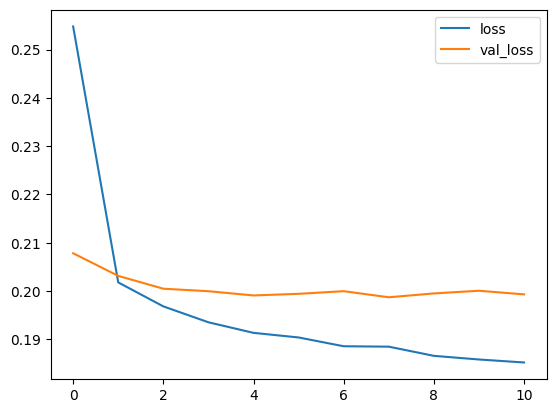

In [7]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 512,
    epochs = 50,
    callbacks = [early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss = {:0.4f}".format(history_df['val_loss'].min()))